[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Training data size: 806
Testing data size: 202


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


0     276.902689
1     276.655459
2     276.671838
3     276.590412
4     276.545354
5     276.486853
6     276.433401
7     276.378133
8     276.323597
9     276.268847
10    276.214235
11    276.159630
12    276.105080
13    276.050568
14    275.996099
15    275.941673
16    275.887288
17    275.832946
18    275.778646
19    275.724387
Name: predicted_mean, dtype: float64
Date
2022-03-15    287.149994
2022-03-16    294.390015
2022-03-17    295.220001
2022-03-18    300.429993
2022-03-21    299.160004
2022-03-22    304.059998
2022-03-23    299.489990
2022-03-24    304.100006
2022-03-25    303.679993
2022-03-28    310.700012
2022-03-29    315.410004
2022-03-30    313.859985
2022-03-31    308.309998
2022-04-01    309.420013
2022-04-04    314.970001
2022-04-05    310.880005
2022-04-06    299.500000
2022-04-07    301.369995
2022-04-08    296.970001
2022-04-11    285.260010
Name: Close, dtype: float64
Date
2022-03-15    276.902689
2022-03-16    276.655459
2022-03-17    276.671838
2022-03-18

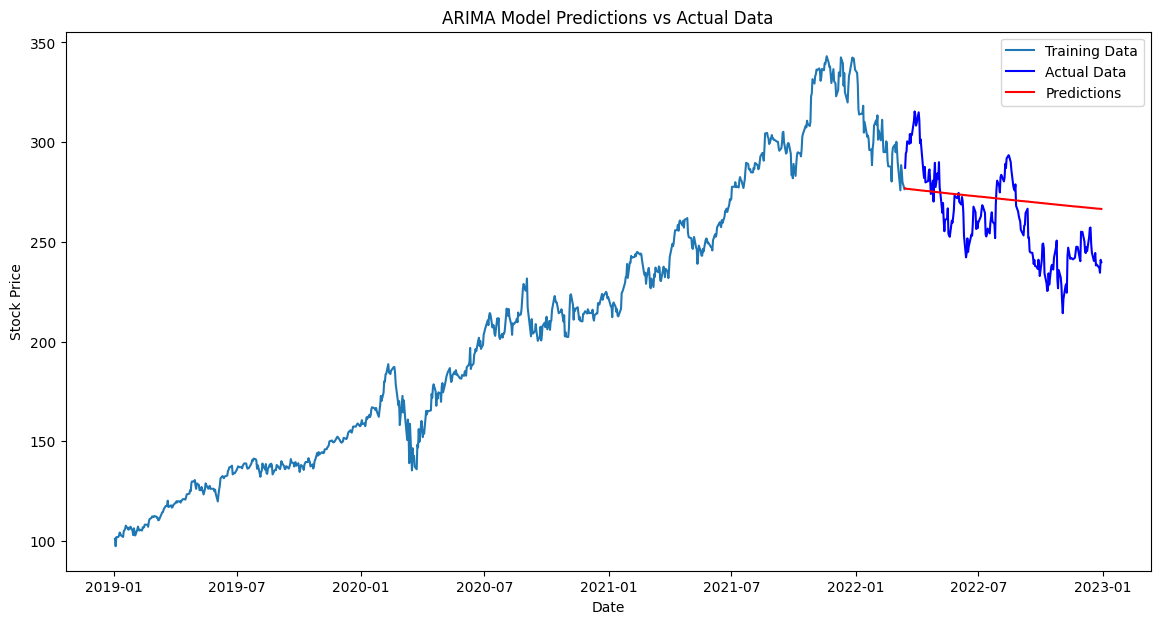

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Define the stock symbol and the time frame
stock_symbol = 'MSFT'
start_date = '2019-01-01'
end_date = '2023-01-01'

# Fetch the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Use the 'Close' prices for ARIMA model
data = data[['Close']].dropna()

# Display the first few rows of the Series
# print(data.head(20))

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data['Close'][:train_size]
test_data = data['Close'][train_size:]

# Verify the sizes of the training and testing sets
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

# Fit the ARIMA model (p, d, q) parameters can be adjusted based on AIC/BIC or PACF/ACF analysis
model = ARIMA(train_data, order=(2, 0, 1))  # Example order, adjust as needed
model_fit = model.fit()

# Check the summary of the model fit
# print(model_fit.summary())

# Forecast for the test period
predictions = model_fit.forecast(steps=len(test_data))
predictions=pd.Series(predictions)
predictions=predictions.reset_index(drop=True)

print(predictions.head(20))

# Convert predictions to a Series with the same index as test_data
# index=test_data.index
predictions_series= pd.Series(predictions,index=test_data.index)

print(test_data.head(20))

# Verify the predictions Series
# predictions_series=predictions_series.fillna(5)
print(predictions_series.head(20))

# Plot the actual data and the predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Data', color='blue')
plt.plot(predictions_series, label='Predictions', color='red')
plt.title('ARIMA Model Predictions vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
Zprint(predictions_series.index)
print(test_data.index)
print(predictions.index)

DatetimeIndex(['2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-28',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=202, freq=None)
DatetimeIndex(['2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-28',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=202, freq=None)
RangeIndex(start=0, stop=202, step=1)


In [ ]:
print(train_data.isna().sum())


0


[*********************100%%**********************]  1 of 1 completed


<Figure size 1400x700 with 0 Axes>

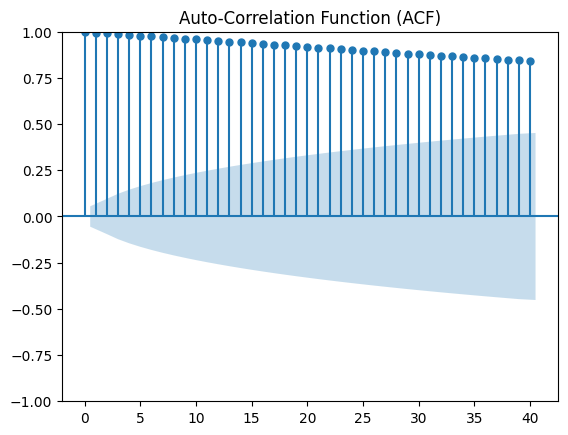

<Figure size 1400x700 with 0 Axes>

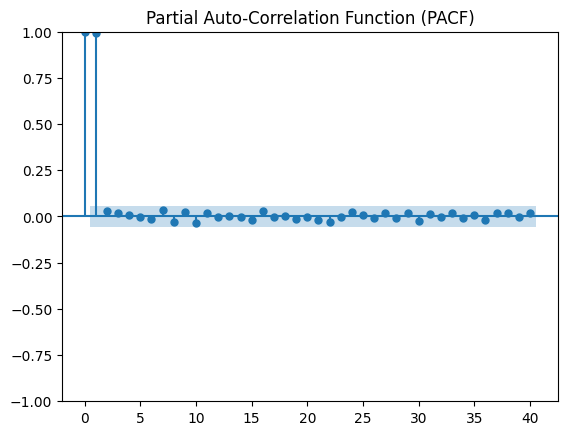

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define the stock symbol and the time frame
stock_symbol = 'MSFT'
start_date = '2019-01-01'
end_date = '2024-01-01'

# Fetch the data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Use the 'Close' prices for ARIMA model
data = data['Close'].dropna()

# Plot the ACF
plt.figure(figsize=(14, 7))
plot_acf(data, lags=40)
plt.title('Auto-Correlation Function (ACF)')
plt.show()

# Plot the PACF
plt.figure(figsize=(14, 7))
plot_pacf(data, lags=40)
plt.title('Partial Auto-Correlation Function (PACF)')
plt.show()
